In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# modelling
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import BaseDecisionTree
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR 
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,median_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

<frozen importlib._bootstrap>:488: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


import the csv data as pandas dataframe

In [2]:
df=pd.read_csv('data/raw.csv')

show top 5 records

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Preparing X and Y variables

In [4]:
X = df.drop(columns=['math_score'],axis=1)

In [5]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [6]:
print("categories in 'gender' variable:                   ",df.gender.unique())

print("categories in 'race_ethnicity' variable:           ",df.race_ethnicity.unique())

print("categories in 'lunch' variable:                    ",df.lunch.unique())
print("categories in 'test_preparation_course' variable:  ",df.test_preparation_course.unique())


categories in 'gender' variable:                    ['female' 'male']
categories in 'race_ethnicity' variable:            ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'lunch' variable:                     ['standard' 'free/reduced']
categories in 'test_preparation_course' variable:   ['none' 'completed']


In [7]:
y = df.math_score
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [9]:
# create column transformer with 3 types of transformers
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_trnsformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer,cat_features),
        ("StandardScaler", numeric_trnsformer,num_features),
    ]
)

In [10]:
X= preprocessor.fit_transform(X)

In [11]:
X.shape

(1000, 19)

In [12]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [13]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((800, 19), (200, 19))

### create an evalute function to give all metrics after model training

In [17]:
from sklearn.metrics import mean_absolute_error


def evalute_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true, predicted)
    return mae,rmse,r2_square

In [24]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# Assuming evalute_model is defined somewhere
# def evaluate_model(true_values, predictions):
#     # Code for calculating MAE, RMSE, and R2 here
#     return mae, rmse, r2

# Dictionary of models
models = {
    "linear regression" : LinearRegression(),
    "lasso" : Lasso(),
    "ridge" : Ridge(),
    "k-neighbors regressor" : KNeighborsRegressor(),
    "decision tree" : DecisionTreeRegressor(),
    "random forest regressor" : RandomForestRegressor(),
    "XGBRegressor" : XGBRegressor(),
    "CatBoostRegressor" : CatBoostRegressor(verbose=False),
    "AdaBoostRegressor" : AdaBoostRegressor()
}

model_list = []
r2_list = []

# Loop through the models
for i in range(len(list(models))):
    model_name = list(models.keys())[i]  # Model name
    model = list(models.values())[i]     # Model object
    
    # Fit the model
    model.fit(X_train, Y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate train and test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evalute_model(Y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evalute_model(Y_test, y_test_pred)

    # Print model name
    print(model_name)
    model_list.append(model_name)

    # Print model performance for training set
    print("Model performance for training set")
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    print('')
    print('----------------------------------------------------')
    print('')

    # Print model performance for test set
    print("Model performance for test set")
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

    # Append R2 score to the list
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')


linear regression
Model performance for training set
- Root Mean Squared Error: 5.3243
- Mean Absolute Error: 4.2671
- R2 Score: 0.8743

----------------------------------------------------

Model performance for test set
- Root Mean Squared Error: 5.3960
- Mean Absolute Error: 4.2158
- R2 Score: 0.8803


lasso
Model performance for training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071

----------------------------------------------------

Model performance for test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


ridge
Model performance for training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743

----------------------------------------------------

Model performance for test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


k-neighbors regressor
Model performance for training set
- Root Mean Squared Error: 5.7077
- Mean Absol

In [30]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,ridge,0.880593
0,linear regression,0.880345
5,random forest regressor,0.853100
7,CatBoostRegressor,0.851632
8,AdaBoostRegressor,0.846988
6,XGBRegressor,0.827797
1,lasso,0.825320
3,k-neighbors regressor,0.783813
4,decision tree,0.744615


### Linear Regression

In [32]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, Y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(Y_test, y_pred)*100
print("Accuracy of the model is %.2f "%score)


Accuracy of the model is 88.03 


### Plot y_pred and y_test

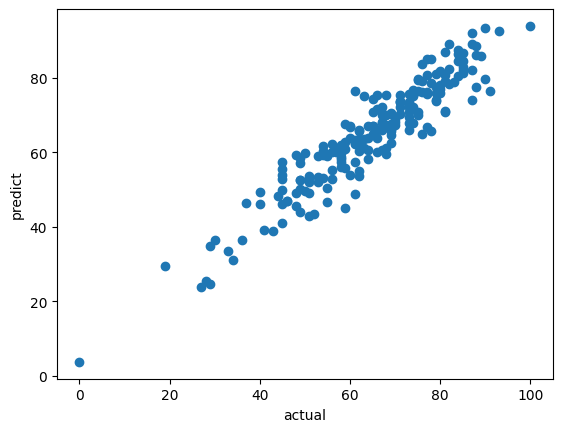

In [35]:
plt.scatter(Y_test, y_pred)
plt.xlabel('actual')
plt.ylabel('predict');

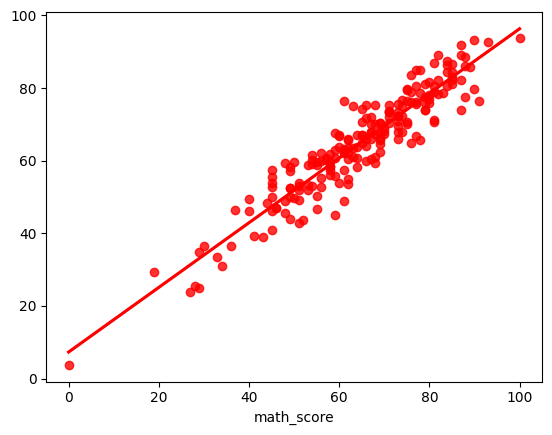

In [37]:
sns.regplot(x=Y_test,y=y_pred,ci=None,color ='red');


### Difference between Actual and Predicted Values

In [40]:
pred_df=pd.DataFrame({'Actual Value':Y_test,'Predicted Value':y_pred,'Difference':Y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.507812,14.492188
737,53,58.953125,-5.953125
740,80,76.960938,3.039062
660,74,76.757812,-2.757812
411,84,87.539062,-3.539062
...,...,...,...
408,52,43.546875,8.453125
332,62,62.031250,-0.031250
208,74,67.976562,6.023438
613,65,67.132812,-2.132812
